In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['font.sans-serif'] = ["SimHei"]
# plt.rcParams["axes.unicode_minus"] = False


In [24]:
df = pd.read_csv("./示例数据/order_train1.csv")
df.head()

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
0,2015/9/1,104,22069,307,403,offline,1114.0,19
1,2015/9/1,104,20028,301,405,offline,1012.0,12
2,2015/9/2,104,21183,307,403,online,428.0,109
3,2015/9/2,104,20448,308,404,online,962.0,3
4,2015/9/2,104,21565,307,403,offline,1400.0,3


In [25]:
dic = {"offline":1,"online":0}
df['sales_chan_name'] = df['sales_chan_name'].map(dic)

In [26]:
import chinese_calendar
df["order_date"]=df["order_date"].apply(pd.to_datetime,format='%Y-%m-%d')

In [27]:
df['Year'] = df.order_date.dt.year
df['Month'] = df.order_date.dt.month
df['day'] = df.order_date.dt.day
df["day of the week"] = df.order_date.dt.dayofweek 

In [28]:
df["quarter"] = df['order_date'].dt.quarter
df['is_month_start'] = df['order_date'].dt.is_month_start
df['is_month_end'] = df['order_date'].dt.is_month_end
df['is_quarter_start'] = df['order_date'].dt.is_quarter_start
df['is_quarter_end'] = df['order_date'].dt.is_quarter_end
df['is_year_start'] = df['order_date'].dt.is_year_start
df['is_year_end'] = df['order_date'].dt.is_year_end
df['is_workday']=df['order_date'].map(lambda x:chinese_calendar.is_workday(x))
df["is_holiday"]=df["order_date"].map(lambda x:chinese_calendar.is_holiday(x))

In [29]:
for u in df.columns:
    if df[u].dtype==bool:
        df[u]=df[u].astype('int')

In [30]:
df.columns

Index(['order_date', 'sales_region_code', 'item_code', 'first_cate_code',
       'second_cate_code', 'sales_chan_name', 'item_price', 'ord_qty', 'Year',
       'Month', 'day', 'day of the week', 'quarter', 'is_month_start',
       'is_month_end', 'is_quarter_start', 'is_quarter_end', 'is_year_start',
       'is_year_end', 'is_workday', 'is_holiday'],
      dtype='object')

# （5） 按照时间段

### （1）按照每周的日期

day_of_the_week 中的 $0\sim6$ 分别是 星期一至星期日

In [31]:
week_demand = df.groupby(['day of the week'])['ord_qty'].mean().reset_index()
week_demand

,day of the week,ord_qty
0,0,89.387779
1,1,85.558909
2,2,91.404325
3,3,87.878030
4,4,89.452612
5,5,95.955901
6,6,105.216177


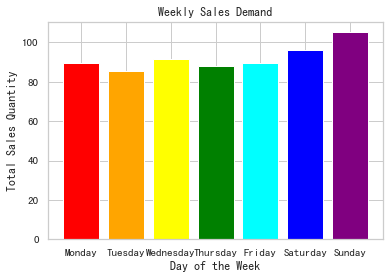

In [32]:
import matplotlib.pyplot as plt

# 将星期几转换为具体的名称
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 绘制柱状图
plt.bar(week_demand['day of the week'], week_demand['ord_qty'], color=['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'purple'])

# 设置图形属性
plt.title('Weekly Sales Demand')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Quantity')
plt.xticks(range(7), day_names)

# 显示图形
plt.show()


<AxesSubplot: xlabel='day of the week', ylabel='ord_qty'>

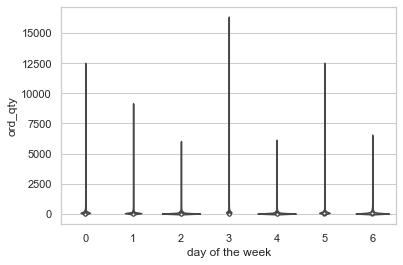

In [33]:
import seaborn as sns
sns.set_style("whitegrid")

week_demand = df.groupby(['day of the week'])['ord_qty'].mean().reset_index()

sns.violinplot(x='day of the week', y='ord_qty', data=df)


### (2) 按照月的每一天

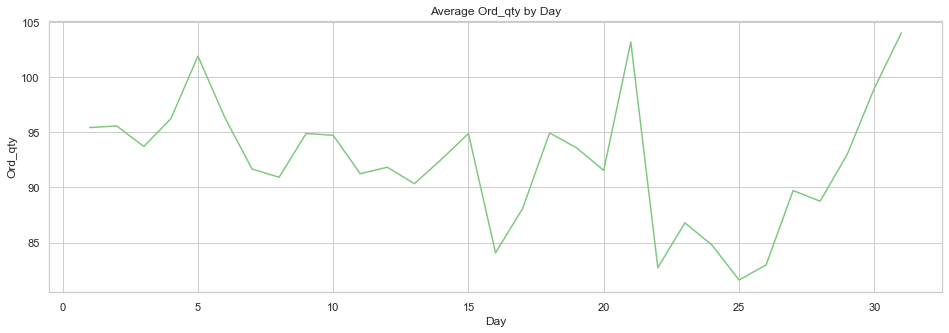

In [34]:
day_of_demand = df.groupby(['day'])['ord_qty'].mean().reset_index()
plt.figure(figsize=(16, 5))
plt.plot(day_of_demand['day'], day_of_demand['ord_qty'])
plt.xlabel('Day')
plt.ylabel('Ord_qty')
plt.title('Average Ord_qty by Day')
plt.show()

### (3) 按照月份

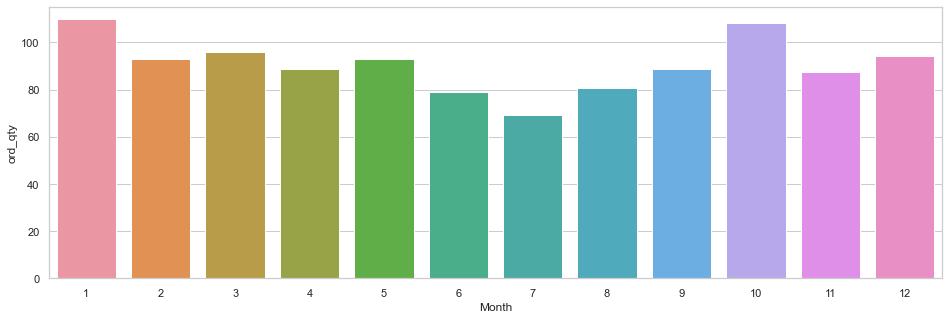

In [35]:
monthly_sales = df.groupby(['Month'])['ord_qty'].mean().reset_index()
plt.figure(figsize=(16, 5))
sns.barplot(x='Month', y='ord_qty', data=monthly_sales)
plt.show()

### (4) 按照年份

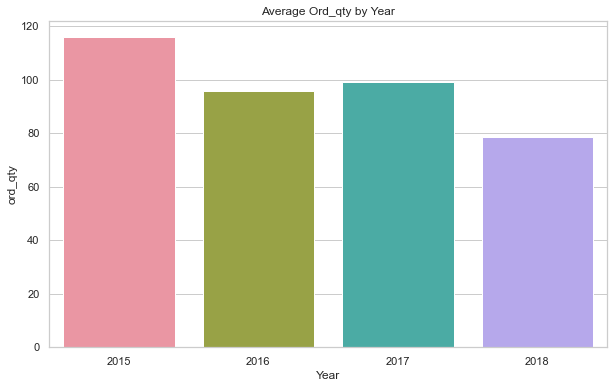

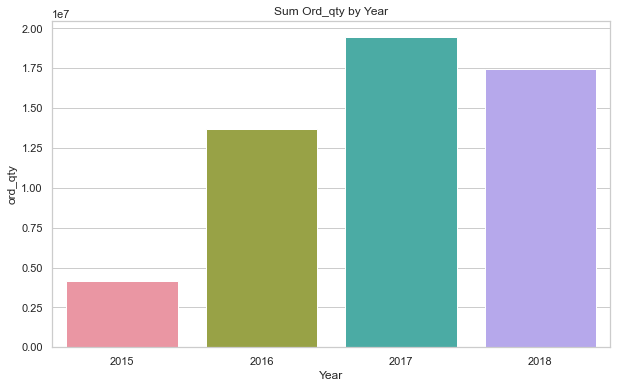

In [36]:
## 由于2015只有第四个季度的数据，而从上面的图上可以看出来，第四季度销售数据均量比较大，所以2015年的数据必然更大，似乎没啥参考意义，还是看后三年的数据更全
monthly_sales = df.groupby(['Year'])['ord_qty'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='ord_qty', data=monthly_sales)
plt.title('Average Ord_qty by Year')
plt.show()

monthly_sales = df.groupby(['Year'])['ord_qty'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='ord_qty', data=monthly_sales)
plt.title('Sum Ord_qty by Year')
plt.show()

### (4) 按照月份的上中下旬新进分类查看销售的  均量 与 总量

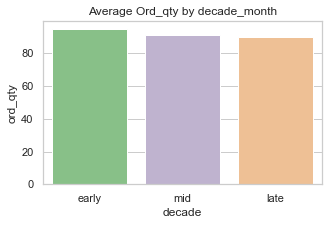

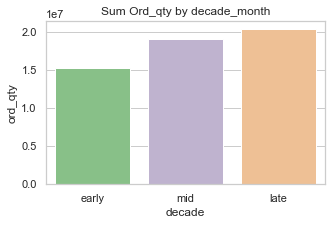

In [37]:
df['decade'] = pd.cut(df['order_date'].dt.day, bins=[0, 10, 20, 31], labels=['early', 'mid', 'late'])
monthly_sales = df.groupby(['decade'])['ord_qty'].mean().reset_index()
plt.figure(figsize=(5, 3))
sns.barplot(x='decade', y='ord_qty', data=monthly_sales)
plt.title('Average Ord_qty by decade_month')
plt.show()
# ================================================================= #
monthly_sales = df.groupby(['decade'])['ord_qty'].sum().reset_index()
plt.figure(figsize=(5, 3))
sns.barplot(x='decade', y='ord_qty', data=monthly_sales)
plt.title('Sum Ord_qty by decade_month')
plt.show()

NameError: name 'ticker' is not defined

/Users/xuan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  func(*args, **kwargs)
/Users/xuan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  func(*args, **kwargs)
/Users/xuan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  func(*args, **kwargs)
/Users/xuan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  func(*args, **kwargs)
/Users/xuan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from current font.
  func(*args, **kwargs)
/Users/xuan/opt/anaconda3/lib/python3.8/site-packa

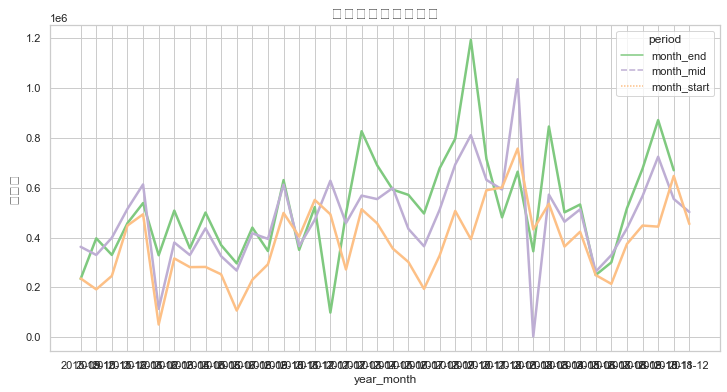

In [38]:

df['day_of_month'] = df['order_date'].dt.day
df['year_month'] = df['order_date'].dt.strftime('%Y-%m')
df['period'] = np.where(df['day_of_month'] <= 10, 'month_start',
                        np.where(df['day_of_month'] > 20, 'month_end', 'month_mid'))

grouped = df.groupby(['year_month', 'period'])['ord_qty'].sum().reset_index()
pivot_table = grouped.pivot(index='year_month', columns='period', values='ord_qty')

# 设置背景风格和颜色
sns.set(style="whitegrid", palette=sns.color_palette('Accent', n_colors=3))

# 绘制图表
plt.figure(figsize=(12, 6))  # 设置画布大小
ax = sns.lineplot(data=pivot_table, linewidth=2.5)  # 绘制线条

ax.lines[0].set_linestyle("-")
ax.lines[1].set_linestyle("-")
ax.lines[2].set_linestyle("-")


# sns.choose_colorbrewer_palette('qualitative')
# ax.lines[0].set_label('Month Start')
# ax.lines[1].set_label('Month Mid')
# ax.lines[2].set_label('Month End')

# 设置坐标轴标签和标题
# ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('需求量', fontsize=14)
ax.set_title('不同时期需求量分析', fontsize=16)

# 设置x轴刻度间隔
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))

# 去除网格和边框
ax.grid(False)
sns.despine()
# 调整线条颜色和标签
# sns.color_palette('Accent', n_colors=3).as_hex()


plt.show()


### (5) 按照是否为节假日

- 仅从是否为节假日

In [ ]:
holiday_sales = df.groupby(['is_holiday'])['ord_qty'].mean().reset_index()
plt.figure(figsize=(5, 3))
sns.barplot(x='is_holiday', y='ord_qty', data=holiday_sales)
plt.title('Average Ord_qty by is_holiday')
plt.show()
# ================================================================= #
holiday_sales = df.groupby(['is_holiday'])['ord_qty'].sum().reset_index()
plt.figure(figsize=(5, 3))
sns.barplot(x='is_holiday', y='ord_qty', data=holiday_sales)
plt.title('Sum Ord_qty by is_holiday')
plt.show()

- 考虑地区与节假日

In [ ]:
holiday_sales = df.groupby(['sales_region_code', 'is_holiday'])['ord_qty'].mean().reset_index()
sns.barplot(data=holiday_sales, x='sales_region_code', y='ord_qty', hue='is_holiday')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
sns.barplot(data=holiday_sales, x='is_holiday', y='ord_qty', hue='sales_region_code')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# (6) 节假日

### （1）直接分析节假日，居然和 第（5）问的第 （5）点写重了 那就那个吧（头大）

In [ ]:
# 见5.5

- 模仿学长弄在一张图里
- 大类分类

In [ ]:
df

In [ ]:
# 简化下数据
data = df.drop([  'Year', 'Month','day', 'day of the week', 'quarter', 'is_month_start', 'is_month_end','is_quarter_start', 'is_quarter_end', 'is_year_start', 'is_year_end'], axis=1)

In [ ]:
holiday_sales = data.groupby(['is_holiday','first_cate_code'])['ord_qty'].mean().reset_index()
first_code = [301, 303, 306, 305, 302, 307, 308, 304]
holiday_sales

# 每个大类分别绘制柱状图
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))

# 设置字体
plt.rcParams['font.family'] = 'SimHei'

# 循环绘制
for i, code in enumerate(first_code):
    row = i // 4
    col = i % 4
    ax = axs[row][col]
    sub_data = data[data['first_cate_code']==code]
    sns.barplot(x='is_holiday', y='ord_qty',  data=holiday_sales, ax=ax)
    ax.set_title(f"大类{code}是否节假日与销量柱状图")
    ax.set_xlabel("is holiday")
    ax.set_ylabel("销量")

# 调整布局
plt.tight_layout()

# 展示图像
plt.show()

- 二级分类


In [ ]:
holiday_sales = data.groupby(['is_holiday','second_cate_code'])['ord_qty'].mean().reset_index()
second_code = [401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412]

# 每个小类分别绘制柱状图
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(9, 15))

# 设置字体
plt.rcParams['font.family'] = 'SimHei'

# 循环绘制
for i, code in enumerate(second_code):
    row = i // 3
    col = i % 3
    ax = axs[row][col]
    sub_data = data[data['second_cate_code']==code]
    sns.barplot(x='is_holiday', y='ord_qty',  data=holiday_sales, ax=ax)
    ax.set_title(f"小类{code}是否节假日与销量柱状图")
    ax.set_xlabel("is holiday")
    ax.set_ylabel("销量")

# 调整布局
plt.tight_layout()

# 展示图像
plt.show()

### (2) 按价格等级分类


In [24]:
# holiday_sales = data.groupby(['is_holiday','price_level'])['ord_qty'].mean().reset_index()
# pl_list = ['<200', '200-500',  '500-2000','>2000']

# # 每个小类分别绘制柱状图
# fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# # 设置字体
# plt.rcParams['font.family'] = 'SimHei'

# # 循环绘制
# for i, code in enumerate(pl_list):
#     row = i // 2
#     col = i % 2
#     ax = axs[row][col]
#     sub_data = data[data['price_level']==code]
#     sns.barplot(x='is_holiday', y='ord_qty',  data=holiday_sales, ax=ax)
#     ax.set_title(f"价格区间{code}是否节假日与销量柱状图")
#     ax.set_xlabel("is holiday")
#     ax.set_ylabel("销量")

# # 调整布局
# plt.tight_layout()

# # 展示图像
# plt.show()

突然插入一个别的分析

In [39]:
df

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,Year,Month,...,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_workday,is_holiday,decade,day_of_month,year_month,period
0,2015-09-01,104,22069,307,403,1,1114.0,19,2015,9,...,0,0,0,0,1,0,early,1,2015-09,month_start
1,2015-09-01,104,20028,301,405,1,1012.0,12,2015,9,...,0,0,0,0,1,0,early,1,2015-09,month_start
2,2015-09-02,104,21183,307,403,0,428.0,109,2015,9,...,0,0,0,0,1,0,early,2,2015-09,month_start
3,2015-09-02,104,20448,308,404,0,962.0,3,2015,9,...,0,0,0,0,1,0,early,2,2015-09,month_start
4,2015-09-02,104,21565,307,403,1,1400.0,3,2015,9,...,0,0,0,0,1,0,early,2,2015-09,month_start
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597689,2018-12-20,102,20994,302,408,1,843.0,59,2018,12,...,0,0,0,0,1,0,mid,20,2018-12,month_mid
597690,2018-12-20,102,21875,302,408,1,762.0,502,2018,12,...,0,0,0,0,1,0,mid,20,2018-12,month_mid
597691,2018-12-20,102,20215,302,408,1,2013.0,106,2018,12,...,0,0,0,0,1,0,mid,20,2018-12,month_mid
597692,2018-12-20,102,20195,302,408,1,2120.0,187,2018,12,...,0,0,0,0,1,0,mid,20,2018-12,month_mid


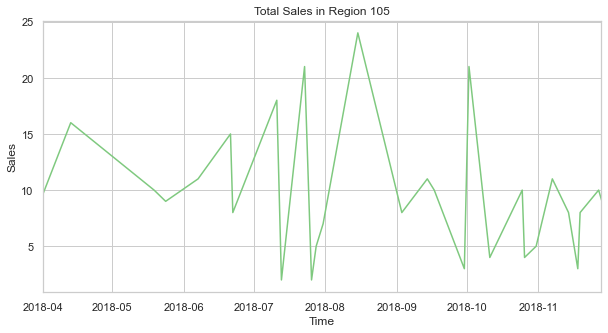

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the sales data from a CSV file
matrix = df

# Filter out data for the 40th month and a specific category of products
matrix = matrix[matrix["second_cate_code"] == 411]

# Define the sales regions to analyze
# sales_region_list = [101, 102, 103, 104, 105]

sales_region_list = [105]
# Loop over each sales region in the list
for sales_region in sales_region_list:
    # Create a new figure and axis for the current sales region
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Filter the sales data to only include data for the current sales region
    region_df = matrix[matrix["sales_region_code"] == sales_region]
    
    # Group the sales data by month and sum the sales for all products
    sales_by_month = region_df.groupby("order_date")["ord_qty"].sum()
    
    # Set the x-axis limit to the desired date range
    ax.set_xlim(pd.Timestamp('2018-04-01'), pd.Timestamp('2018-11-28'))
    
    # Plot the total sales for the current sales region
    ax.plot(sales_by_month.index, sales_by_month.values)
    
    # Add labels and legend to the plot
    ax.set_title(f"Total Sales in Region {sales_region}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Sales")
    
    # Display the plot for the current sales region
    plt.show()


# （7）促销 例如 618 11.11 等促销活动月份

In [51]:
# 增加一行是否为促销月份（双十一，六幺八）的特征
df['is_promotion'] = ((df['order_date'].dt.month == 6) & (df['order_date'].dt.day >= 4) & (df['order_date'].dt.day <= 18)) | ((df['order_date'].dt.month == 11) & (df['order_date'].dt.day >= 1) & (df['order_date'].dt.day <= 11))
df['is_promotion'] = df['is_promotion'].astype(int)


### (1) 对每个月按照线上（sales_chan_name == 0）线下（* == 1）进行销量均量统计

<AxesSubplot: xlabel='Month', ylabel='ord_qty'>

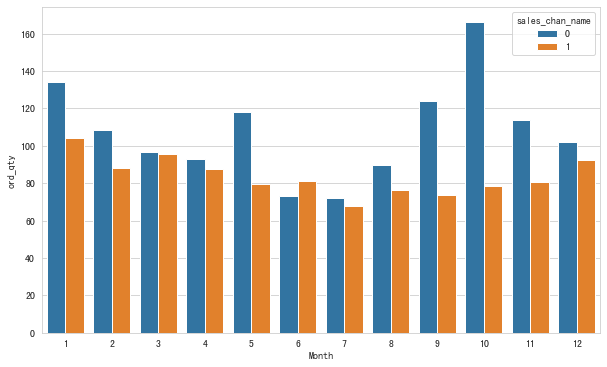

In [26]:
monthly_sales = df.groupby(['Month', 'sales_chan_name'])['ord_qty'].mean().reset_index()
monthly_sales
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=monthly_sales, x='Month', y='ord_qty', hue='sales_chan_name', ax=ax)

### (2) 按照是否是促销日 ，线上（sales_chan_name == 0）线下（* == 1）进行销量均量统计

In [53]:
promotion_sales

,is_promotion,sales_chan_name,ord_qty
0,0,0,113.795248
1,0,1,84.347899
2,1,0,92.429559
3,1,1,81.495817


Text(0.5, 1.0, 'Average Order Quantity by Sales Channel and Promotion')

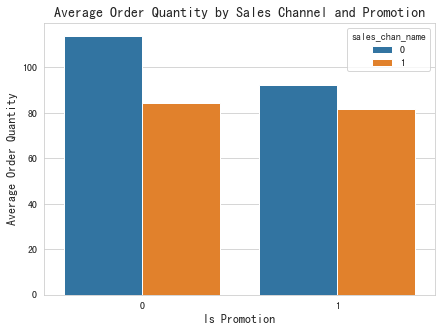

In [55]:
promotion_sales= df.groupby(['is_promotion', 'sales_chan_name'])['ord_qty'].mean().reset_index()
promotion_sales

fig, ax = plt.subplots(figsize=(7,5))

sns.barplot(data=promotion_sales, x='is_promotion', y='ord_qty', hue='sales_chan_name', ax=ax)

ax.set_xlabel('Is Promotion', fontsize=12)
ax.set_ylabel('Average Order Quantity', fontsize=12)
ax.set_title('Average Order Quantity by Sales Channel and Promotion', fontsize=14)



In [28]:
df

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,Year,Month,...,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_workday,is_holiday,decade,is_promotion
0,2015-09-01,104,22069,307,403,1,1114.0,19,2015,9,...,1,0,0,0,0,0,1,0,early,0
1,2015-09-01,104,20028,301,405,1,1012.0,12,2015,9,...,1,0,0,0,0,0,1,0,early,0
2,2015-09-02,104,21183,307,403,0,428.0,109,2015,9,...,0,0,0,0,0,0,1,0,early,0
3,2015-09-02,104,20448,308,404,0,962.0,3,2015,9,...,0,0,0,0,0,0,1,0,early,0
4,2015-09-02,104,21565,307,403,1,1400.0,3,2015,9,...,0,0,0,0,0,0,1,0,early,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597689,2018-12-20,102,20994,302,408,1,843.0,59,2018,12,...,0,0,0,0,0,0,1,0,mid,0
597690,2018-12-20,102,21875,302,408,1,762.0,502,2018,12,...,0,0,0,0,0,0,1,0,mid,0
597691,2018-12-20,102,20215,302,408,1,2013.0,106,2018,12,...,0,0,0,0,0,0,1,0,mid,0
597692,2018-12-20,102,20195,302,408,1,2120.0,187,2018,12,...,0,0,0,0,0,0,1,0,mid,0


In [29]:
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['date_block_num'] = (df['year'] - 2015) * 12 + df['month']

In [22]:
import matplotlib.pyplot as plt

# 计算存在超过12个月的item_code
item_month_count = df.groupby('item_code')['date_block_num'].nunique()
valid_item_codes = item_month_count[item_month_count >= 12].index

# 将组合和销量增长情况存储到结果列表中
result_list = []
for item_code in valid_item_codes:
    for sales_region_code, group in df[df['item_code'] == item_code].groupby('sales_region_code'):
        # 计算该组合在双十一、618期间和非活动期间的平均销量
#         根据订单日期划分双十一期间和非双十一期间
#         group['is_1111'] = (group['order_date'].dt.month == 11) & (group['order_date'].dt.day >= 1) & (group['order_date'].dt.day <= 11)
#         group['is_non_1111'] = ~group['is_1111']
        
        
        
        #  618时期和非618时期
        group['is_1111'] = (group['order_date'].dt.month == 6) & (group['order_date'].dt.day >= 4) & (group['order_date'].dt.day <= 18)
        group['is_non_1111'] = ~group['is_1111']
        
        # 计算该组合在双十一期间和非双十一期间的平均销量
        mean_qty_promotion = group[group['is_1111']]['ord_qty'].mean()
        mean_qty_non_promotion = group[group['is_non_1111']]['ord_qty'].mean()

#         mean_qty_promotion = group[(group['order_date'].dt.month == 11) | (group['order_date'].dt.month == 6)]['ord_qty'].mean()
#         mean_qty_non_promotion = group[(group['order_date'].dt.month != 11) & (group['order_date'].dt.month != 6)]['ord_qty'].mean()

        # 排除销量特别小的商品，比如平均销量<100的
        if mean_qty_non_promotion >= 100:
            # 排除是其刚发售时增长影响的，可能会干扰我们判断
            if group['date_block_num'].max() >= 3:
                growth_rate = (mean_qty_promotion - mean_qty_non_promotion) / mean_qty_non_promotion
                result_list.append((item_code, sales_region_code, growth_rate))

# 将结果列表转换为一个DataFrame
result_df = pd.DataFrame(result_list, columns=['item_code', 'sales_region_code', 'growth_rate'])

# 按增长率从高到低排序
result_df = result_df.sort_values('growth_rate', ascending=False)

# 取前20个组合
top20_df = result_df.head(50)

# 对结果进行可视化
plt.figure(figsize=(10, 6))
plt.bar(top20_df['item_code'].astype(str) + '-' + top20_df['sales_region_code'].astype(str), top20_df['growth_rate'])
plt.xticks(rotation=90)
plt.xlabel('item_code-sales_region_code')
plt.ylabel('Growth rate')
plt.title('Top 20 item-region combinations with the highest growth rate during 11.11 and 6.18')
plt.show()


KeyError: 'Column not found: date_block_num'

In [46]:
top20_df.head(10)

,item_code,sales_region_code,growth_rate
32,20103,105,6.456647
98,20296,102,3.719938
191,20589,105,2.705621
168,20545,102,2.621259
488,21587,101,2.449948
246,20773,103,1.891568
372,21203,101,1.829674
117,20392,101,1.794776
167,20545,101,1.740879
545,21846,103,1.470073


In [47]:
affected_items = top20_df['item_code'].tolist()
affected_items_df = df[df['item_code'].isin(affected_items)][['item_code', 'second_cate_code']].drop_duplicates()
category_counts = affected_items_df.groupby('second_cate_code').size().reset_index(name='count')
# plt.figure(figsize=(10, 6))
# plt.bar(category_counts['second_cate_code'], category_counts['count'])
# plt.xticks(rotation=90)
# plt.xlabel('Category')
# plt.ylabel('Number of items')
# plt.title('Distribution of affected items by category')
# plt.show()

category_counts

,second_cate_code,count
0,401,4
1,402,1
2,403,3
3,404,2
4,407,22
5,408,7
6,412,7


In [112]:
merge_df

,item_code,sales_region_code,date_block_num,ord_qty,sales_growth_rate
0,20002,103,13,1370,105.384615
1,20002,105,24,588,24.500000
2,20003,101,23,1220,53.043478
3,20003,102,19,1665,87.631579
4,20003,103,21,2865,136.428571
...,...,...,...,...,...
2019,22082,101,14,114,8.142857
2020,22082,102,19,165,8.684211
2021,22082,103,14,119,8.500000
2022,22084,102,24,1784,74.333333


In [99]:
top20_df['item_sales_region'] = top20_df['item_code'].astype(str) + '-' + top20_df['sales_region_code'].astype(str)


<ipython-input-99-c27d276a3ab0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top20_df['item_sales_region'] = top20_df['item_code'].astype(str) + '-' + top20_df['sales_region_code'].astype(str)


In [101]:
top20_df

,item_code,sales_region_code,growth_rate,item_sales_region
4259,21655,103,66.833333,21655-103
2622,20997,101,41.125000,20997-101
1390,20526,101,36.440000,20526-101
3411,21306,105,23.583333,21306-105
2046,20773,102,23.111111,20773-102
1625,20616,105,16.481481,20616-105
632,20236,103,16.181818,20236-103
5033,21967,102,14.281250,21967-102
253,20094,102,12.363636,20094-102
4480,21751,105,10.106383,21751-105


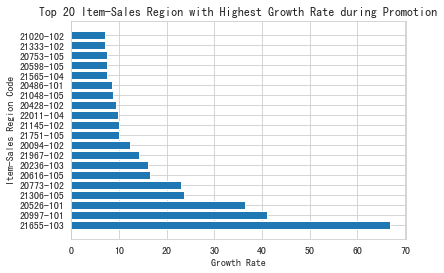

In [100]:
import matplotlib.pyplot as plt

# 绘制条形图
plt.barh(top20_df['item_sales_region'], top20_df['growth_rate'])
plt.xlabel('Growth Rate')
plt.ylabel('Item-Sales Region Code')
plt.title('Top 20 Item-Sales Region with Highest Growth Rate during Promotion')
plt.show()


# (8) 季度对销量的影响

In [ ]:
season_demand = df.groupby(['quarter', 'first_cate_code'])['ord_qty'].mean().reset_index()
season_demand.columns

### （1）不分类别的展示 每个季度的销量均值

In [ ]:
sns.barplot(x='quarter', y='ord_qty', data=season_demand)
plt.title('Seasonal Demand by Product')
plt.show()

### （2）以一级category_code分类查看季度销量均值

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(x='quarter', y='ord_qty', hue='first_cate_code', data=season_demand)
plt.title('Seasonal Demand by Product')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### （3）以地区编码分类查看季度销量均值与总量
- 因为前面发现104地区比较特殊

In [ ]:
season_demand = df.groupby(['quarter', 'sales_region_code'])['ord_qty'].mean().reset_index()
season_demand.columns

In [ ]:
# 这是均值
plt.figure(figsize=(12, 5))
sns.barplot(x='quarter', y='ord_qty', hue='sales_region_code', data=season_demand)
plt.title('Seasonal Demand by Product')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
#  这是总和
season_demand = df.groupby(['quarter', 'sales_region_code'])['ord_qty'].sum().reset_index()
for u in season_demand.columns:
    if season_demand[u].dtype!=int:
        df[u]=df[u].astype('int')
season_demand.loc[season_demand['quarter'] == 4, 'ord_qty'] *= 0.75
plt.figure(figsize=(12, 5))
sns.barplot(x='quarter', y='ord_qty', hue='sales_region_code', data=season_demand)
plt.title('Seasonal Demand by Product')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()